In [1]:
#import python tools for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 11 input and 1 output("quality"). From the table above, there are no null data in the dataset. All data are continuous variables.

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality'>

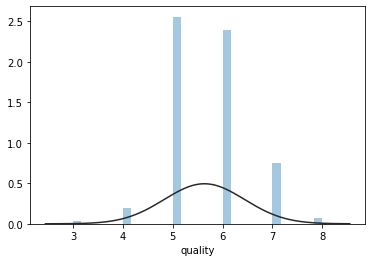

In [5]:
df["quality"].value_counts()
sns.distplot(df["quality"], fit=norm, kde=False)

Most wines are of quality of 5 or 6.

<AxesSubplot:>

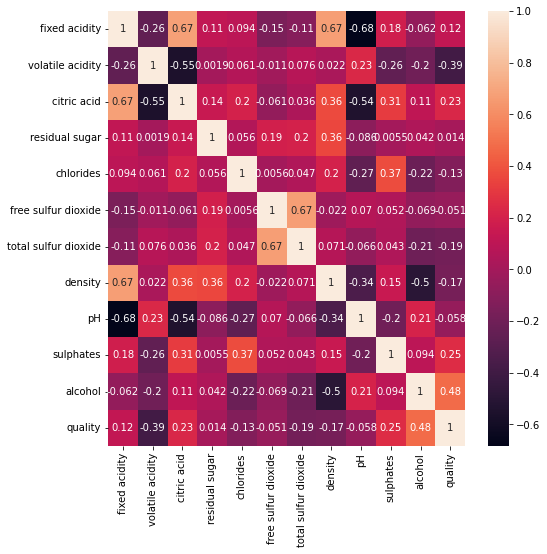

In [6]:
ax = plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)

From the correlation heatmap above, volatile acidity and alcohol has strong relationship with the quality of the wine. For other variables, more study is needed to access the usefulness of the data in predicting the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

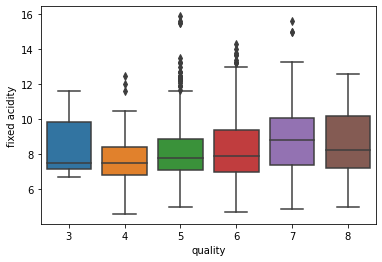

In [7]:
sns.boxplot(y=df['fixed acidity'], x=df['quality'])

Higher quality wine tends to have higher acidity from the table above. However the relationship is not strong.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

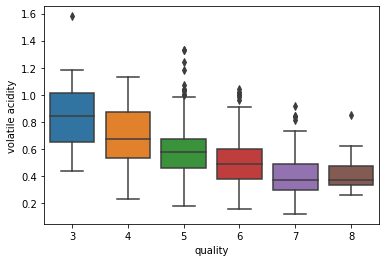

In [8]:
sns.boxplot(y=df['volatile acidity'], x=df['quality'])

There is a general decrease in volatile acidity when quality of wine increases. There is a coefficient of -0.39 to wine quality based on the heatmap of the coefficient of the variables.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

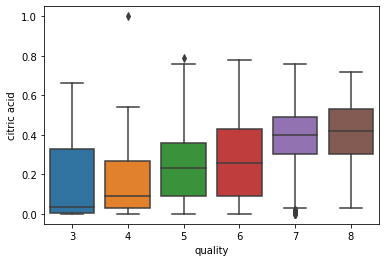

In [9]:
sns.boxplot(y=df['citric acid'], x=df['quality'])

Citric acid levels generally increases with quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

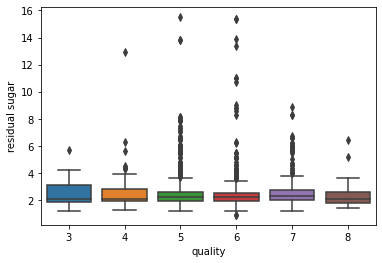

In [10]:
sns.boxplot(y=df['residual sugar'], x=df['quality'])

There is no observable relationship between residual sugar and quality of wine. Hence, this variable will be drop when training the model as including it may introduce bias.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

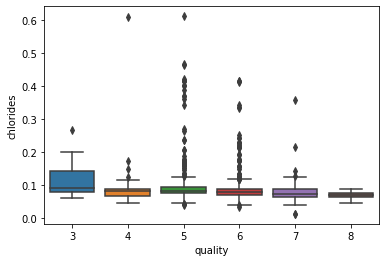

In [11]:
sns.boxplot(y=df['chlorides'], x=df['quality'])

There is no observable relationship between chlorides and quality of wine and there is large number of outliers. Hence, this variable will be drop when training the model as including it may introduce bias.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

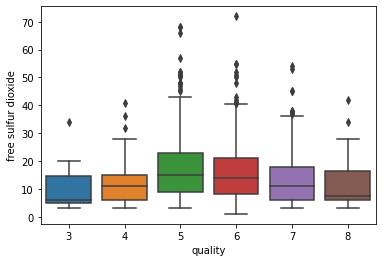

In [12]:
sns.boxplot(y=df['free sulfur dioxide'], x=df['quality'])

Wine with quality of 5 and 6 tend to have a higher free sulfur dioxide than lower and higher quality wine. 

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

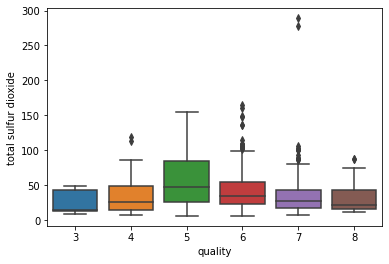

In [13]:
sns.boxplot(y=df['total sulfur dioxide'], x=df['quality'])

Wine with quality of 5 and 6 tend to have a higher total sulfur dioxide than lower and higher quality wine. 

<AxesSubplot:xlabel='quality', ylabel='density'>

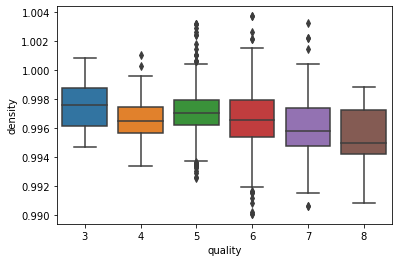

In [14]:
sns.boxplot(y=df['density'], x=df['quality'])

Wine quality of 7 & 8 tends to have a lower density. There tends to be lower density when quality of wine is higher and greater 6.

<AxesSubplot:xlabel='quality', ylabel='pH'>

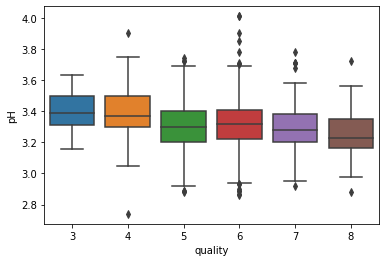

In [15]:
sns.boxplot(y=df['pH'], x=df['quality'])

pH is generally lower for wine of higher quality.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

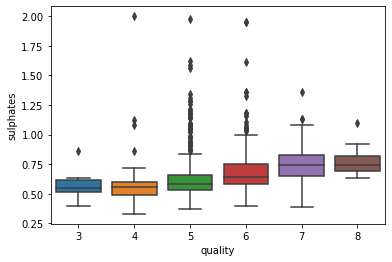

In [16]:
sns.boxplot(y=df['sulphates'], x=df['quality'])

Sulphates is generally higher for higher wine quality.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

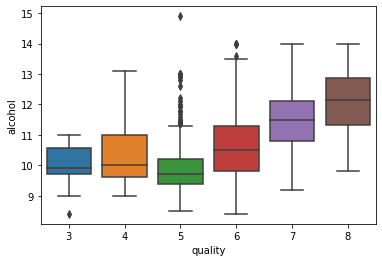

In [17]:
sns.boxplot(y=df['alcohol'], x=df['quality'])

Higher quality wine tend to have higher alcohol.

In [18]:
y = df.pop("quality")

In [19]:
df.drop(columns=["residual sugar", "chlorides"], inplace=True)

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
from numpy import mean, std
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import time

In [22]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [23]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_depth=15)
rf.fit(df, y)
rf_pred=rf.predict(df)
base_rf = round((metrics.accuracy_score(y, rf_pred.round(0).astype(int))) * 100, 2)
print('Random Forest classifier training score is ' + str(base_rf) + '%')      
acc_rf = cross_val_score(rf, df, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_rf_mean = round((mean(acc_rf)*100),2)
acc_rf_std = round((std(acc_rf)*100),2)
print('Random Forest classifier test score is ' + str(acc_rf_mean) + '% (' + str(acc_rf_std) + ')')   

Random Forest classifier training score is 84.05%
Random Forest classifier test score is 65.79% (3.77)


In [24]:
# Logistic Regression
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
logreg.fit(df, y)
logreg_pred=logreg.predict(df)
base_logreg = round((metrics.accuracy_score(y, logreg_pred.round(0).astype(int))) * 100, 2)
print('Logistic Regression training score is ' + str(base_logreg) + '%')      
acc_logreg = cross_val_score(logreg, df, y, scoring='accuracy', cv=cv, n_jobs=-1) 
acc_logreg_mean = round((mean(acc_logreg)*100),2)
acc_logreg_std = round((std(acc_logreg)*100),2)
print('Logistic Regression test score is ' + str(acc_logreg_mean) + '% (' + str(acc_logreg_std) + ')')   

Logistic Regression training score is 60.29%
Logistic Regression test score is 59.29% (4.25)


In [25]:
# K-Means
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 14))
knn.fit(df, y)
knn_pred=knn.predict(df)
base_knn = round((metrics.accuracy_score(y, knn_pred.round(0).astype(int))) * 100, 2)
print('K-neighbours classifier training score is ' + str(base_knn) + '%')      
acc_knn = cross_val_score(knn, df, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_knn_mean = round((mean(acc_knn)*100),2)
acc_knn_std = round((std(acc_knn)*100),2)
print('K-neighbours classifier test score is ' + str(acc_knn_mean) + '% (' + str(acc_knn_std) + ')')   

K-neighbours classifier training score is 63.1%
K-neighbours classifier test score is 58.16% (4.5)


In [26]:
# Support Vector Machines
svc = make_pipeline(StandardScaler(), SVC(C=20))
svc.fit(df, y)
svc_pred=svc.predict(df)
base_svc = round((metrics.accuracy_score(y, svc_pred.round(0).astype(int))) * 100, 2)
print('Support Vector Machines training score is ' + str(base_svc) + '%')      
acc_svc = cross_val_score(svc, df, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_svc_mean = round((mean(acc_svc)*100),2)
acc_svc_std = round((std(acc_svc)*100),2)
print('Support Vector Machines test score is ' + str(acc_svc_mean) + '% (' + str(acc_svc_std) + ')')  

Support Vector Machines training score is 80.55%
Support Vector Machines test score is 61.66% (3.35)


In [27]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(df, y)
gaussian_pred=gaussian.predict(df)
base_gaussian = round((metrics.accuracy_score(y, gaussian_pred.round(0).astype(int))) * 100, 2)
print('Gaussian Naive Bayes training score is ' + str(base_gaussian) + '%')      
acc_gaussian = cross_val_score(gaussian, df, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_gaussian_mean = round((mean(acc_gaussian)*100),2)
acc_gaussian_std = round((std(acc_gaussian)*100),2)
print('Gaussian Naive Bayes test score is ' + str(acc_gaussian_mean) + '% (' + str(acc_gaussian_std) + ')')  

Gaussian Naive Bayes training score is 58.29%
Gaussian Naive Bayes test score is 56.66% (3.16)


In [28]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Score_training': [base_svc, base_knn, base_logreg, 
              base_rf, base_gaussian],
    'Score_mean': [acc_svc_mean, acc_knn_mean, acc_logreg_mean, 
              acc_rf_mean, acc_gaussian_mean],
    'Score_std': [acc_svc_std, acc_knn_std, acc_logreg_std, 
              acc_rf_std, acc_gaussian_std]})

models.sort_values(by='Score_mean', ascending=False)

,Model,Score_training,Score_mean,Score_std
3,Random Forest,84.05,65.79,3.77
0,Support Vector Machines,80.55,61.66,3.35
2,Logistic Regression,60.29,59.29,4.25
1,KNN,63.10,58.16,4.50
4,Naive Bayes,58.29,56.66,3.16


From the table, random forest will be use to build the model as it has the highest accuracy score.

In [29]:
n_estimators = [50, 100, 300, 500]
min_samples_leaf = [5, 10, 20, 30]
max_depth = [2, 5, 10, 15]

param_grid = dict(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth )

In [30]:
start_time = time.time()
rf_op = RandomForestClassifier()
grid = GridSearchCV(estimator=rf_op, param_grid=param_grid, cv = 10, n_jobs=-1)
grid_result = grid.fit(df, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)/60) + ' min')

Best: 0.601623 using {'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 50}
Execution time: 0.43067173957824706 min


In [31]:
final_model = grid_result.best_estimator_

In [32]:
#save the model using pickle
import pickle

In [33]:
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()